# 1.1

cfg._target_ 값이 diffusion_policy.workspace.train_diffusion_unet_lowdim_workspace.TrainDiffusionUnetLowdimWorkspace → 해당 클래스를 인스턴스화하여 실행.

여기서 클래스를 인스턴스화 한다는 것에 대해서 설명

In [1]:
"""
클래스를 사용해서 객체(object)를 만드는 과정을 인스턴스화 라고 한다.
클래스를 만들면 클래스 기반으로 여러개의 객체 인스턴스를 생성 할 수 있다. 
이를 클래스에서 __init__()을 통해 새로운 객체를 만들 때 인스턴스화 했다고 표현
"""
class Car:
    def __init__(self, brand):
        self.brand = brand #속성

    def drive(self):
        print(f"{self.brand} 자동차가 출발합니다.")

# 인스턴스 생성
my_car = Car("Hyundai") #car 클래스를 이용해 인스턴스 생성

# 인스턴스 사용
print(my_car.brand)
my_car.drive()

Hyundai
Hyundai 자동차가 출발합니다.


이해가 가십니까? 인스턴스는 클래스를 그냥 사용하는 무언가를 정의 했을 때, 뉘양스가 인스턴스 사용임.

hydra를 사용하면 yaml 설정 파일에서 클래스를 경로를 지정하고 , 이를 기반으로 자동으로 객체를 생성할 수 있음


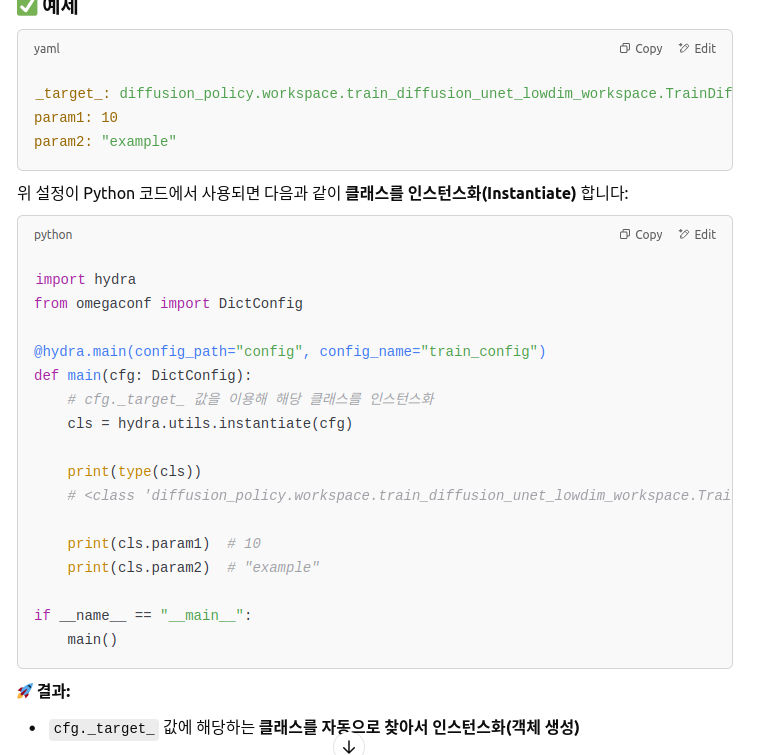

# 1.2 DataLoader 란?

pytorch의 dataloader는 데이터를 미니배치(batch) 단위로 불러오고, 셔플 및 병렬 처리(worker)등을 지원하는 객체이다. 

ex) 배치 사이즈 batch_size : 256은 한번에 몇개의 샘플(데이터)를 모델에 입력할지 설정, 
예시로 데이터셋의 크기가 50,000 이고 batch_size=256이면 총 (50000 / 256) = 196 번(step) 학습해야 1 epoch 완료이다. 

batch_size 가 크면 훈련속도는 빨라지지만 gpu의 메모리가 필요. 보통 일반적으로 16~512 가 적정.

### worker

데이터를 병렬로 로드하는 프로세스 갯수
num_worker = 0 이면 메인 프로세스에서 데이터 로딩(속도 느림)
num_worker = 1 이면 데이터 로딩으로 위한 별도 프로세스 1개 사용
num_worker > 1 이면 여러 프로세스를 사용하여 데이터를 더 빠르게 불러옴

일반적인 설정 
num_workers=0 → CPU 사용량이 낮고, 디버깅할 때 유용
num_workers=1~4 → 소규모 데이터셋에서 적절
num_workers=4~8 → 대규모 데이터셋에서 빠른 데이터 로딩
num_workers=8+ → SSD + 강력한 CPU 환경에서 추천

일반적으로 num_workers = cpu 코어 개수의 절반 ~2/3 로 설정하는 것이 좋음

### shuffle

데이터를 랜덤하게 섞을지 여부
shuffle=True → 매 epoch마다 데이터 순서를 랜덤하게 섞음 (일반적으로 훈련 데이터에는 사용)
shuffle=False → 데이터 순서를 유지 (테스트 데이터에는 보통 사용)

shuffle=True를 사용하면 모델이 특정 데이터 순서에 과적합(overfitting)하는 것을 방지
shuffle=False는 데이터 순서를 유지하기 때문에 재현 가능한 실험을 위해 테스트 데이터에서 사용됨

In [3]:
# 예제 
from torch.utils.data import DataLoader, Dataset
import torch

# 더미 데이터셋 생성
class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.arange(1000)  # 0 ~ 999의 데이터셋

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 데이터셋 인스턴스 생성
dataset = MyDataset()

# DataLoader 생성 (YAML 설정 반영)
dataloader = DataLoader(
    dataset,
    batch_size=256,  # 한 번에 256개 데이터 로드
    shuffle=True,    # 데이터를 랜덤하게 섞음
    num_workers=1    # 데이터 로딩에 1개의 병렬 프로세스 사용
)

# 데이터 로드 예제
for batch in dataloader:
    print(batch)
    break  # 첫 배치만 출력


/home/choi/anaconda3/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([382, 977,   1, 110, 871, 901, 848, 263, 503, 409,  76, 917, 598, 241,
        159, 785, 997, 945, 869,  57, 734, 549, 838, 925,  27, 472, 814, 483,
        823, 991, 305, 310, 142, 886,  16, 769, 842, 944, 208, 811, 374, 783,
        459, 692,  73, 873,  38, 593, 771, 978, 935, 470, 878,  65, 892, 683,
        675, 765, 542, 987, 136, 618, 767, 375, 880, 286, 198, 548, 132, 396,
        387,   4, 799,  13, 389, 185, 659,  89, 391, 248, 296, 545, 986, 114,
        171, 240, 921, 346, 186, 656, 268, 588, 796,  53, 964, 370, 393, 753,
        775, 733, 700, 875, 476, 865, 667, 586, 381, 544, 415, 366, 495, 639,
        537, 196, 906, 943, 245, 898, 302, 961, 766, 319, 357, 170,  59,   6,
        371, 915,  20, 647, 473, 883, 776, 825, 572, 109, 484, 462, 957, 247,
        570, 173, 665, 760, 363, 745, 800, 705, 689, 148, 468, 553, 861, 317,
        378,  15, 590,  97, 100, 818, 517, 822, 658, 140, 902, 358, 884, 308,
        832, 222,   8, 949, 699,  71, 954, 149, 430, 416, 477, 3

## 궁금증 1 cpu 코어 갯수 확인법
os 랑 multiprocessing에 cpu_count 사용

In [4]:
# 내 컴퓨터 코어 갯수 python 코드로 확인 
import os
import multiprocessing

print("총 CPU 개수:", os.cpu_count())  # 모든 논리 코어 개수
print("사용 가능한 CPU 개수:", multiprocessing.cpu_count())  # 실제 사용 가능한 코어 개수


총 CPU 개수: 12
사용 가능한 CPU 개수: 12


## 궁금증 2 val train test data는 어떻게 다름?


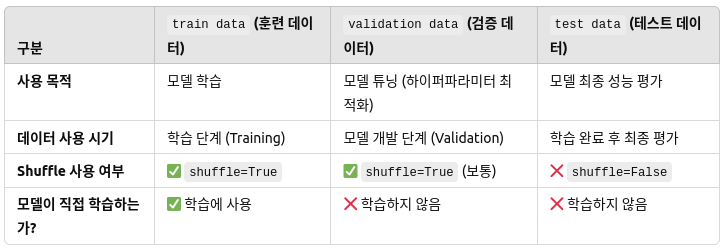